# Fase 2b: Processamentos

    Paulo Eduardo Rodrigues Jr.

Objetivo: Testar o desempenho da segmentaçao e determinar a direção da rua mediante outra abordagem:
        
        - Segmentar a região inferior da rua
        - Determinar o centróide da região de interesse
        - Determinar a direção da rua

Obs: o teste de segmentação utilizando o espaço HSV acabou não sendo concluído, (por falta de tempo até então)

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def showfig(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image, 'gray')

#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [7, 7], 
          'axes.titlesize':16, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 8
         }
plt.rcParams.update(params)

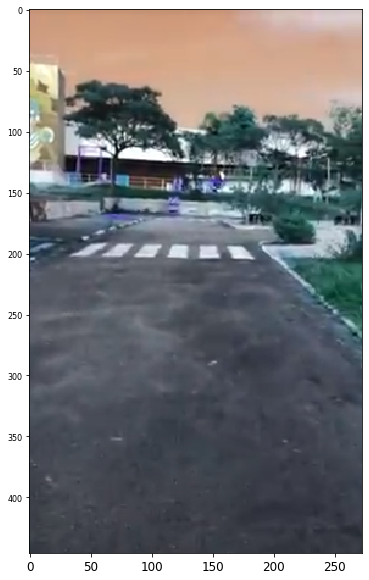

In [3]:
pista =cv2.imread('pista.png')
showfig(pista)

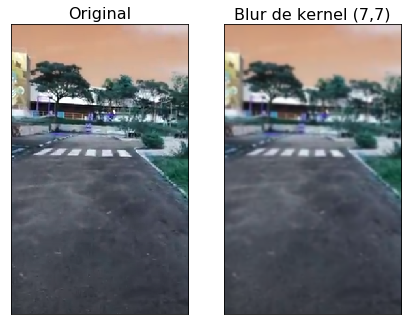

In [4]:

#kernel = np.ones((5,5),np.float32)/25
#dst = cv2.filter2D(pista,-1,kernel)
dst = cv2.GaussianBlur(pista,(7,7),0)

plt.subplot(121),plt.imshow(pista,cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap = 'gray'),plt.title('Blur de kernel (7,7)',)
plt.xticks([]), plt.yticks([])
plt.show()

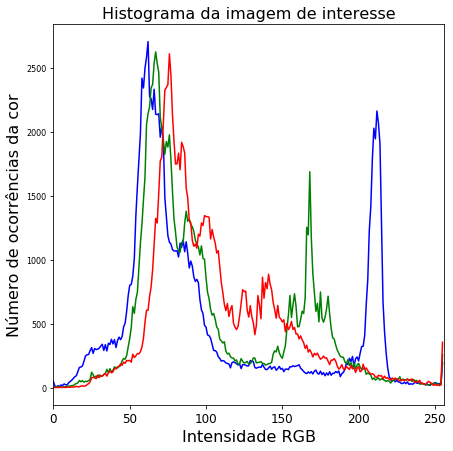

In [6]:
#Verificar o histograma de cores da imagem:

#Da imagem em tons de cinza? Ou dos canais individuais? Opto pelos canais! E pelo gray também
cv2.calcHist(pista,[0],None,[256],[0,256]);

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([pista],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title('Histograma da imagem de interesse')
    plt.xlabel('Intensidade RGB')
    plt.ylabel('Número de ocorrências da cor')
    plt.savefig("Imagens\histograma.pdf")

plt.show()

In [6]:
#Podemos observar que os tons de verde estão contidos entre 150 e 200 

### Conversão para o espaço HSV 

![Pipeline](https://www.researchgate.net/profile/Wei-Ling_Chen/publication/312678134/figure/fig4/AS:523310685736960@1501778398151/HSV-color-space-and-RGB-color-transformation.png)

 - Hue, Saturation, Value -> 
    No OpenCV: 
               Hue = 0-179  (Graus do espaço)
               Saturation = 0-255 (Saturação da cor) - Saturação 0 -> Imagem cinza
               Value = 0-255 (Brilho da imagem)
[Fonte](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html?highlight=hsv)


Isso significa que, em relação a imagem apresentada, o circulo de cores no OpenCV está compactado em 180° 

In [7]:
hsv = cv2.cvtColor(pista, cv2.COLOR_BGR2HSV)
hsv.shape

(446, 273, 3)

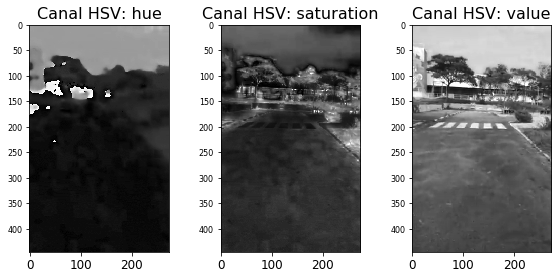

In [8]:
#plotar os canais: Algum insight?

fig=plt.figure(figsize=(8,8))
col= 3
row= 1
imgs= [hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]]
canal=['hue', 'saturation','value']# monta um dicionário logo
#ax permite manipular cada um dos subplots de modo independente
ax=[]
for i in range(1,col*row+1):
    img =imgs[i-1]
    ax.append(fig.add_subplot(row,col,i))
    plt.imshow(img,'gray')
    ax[-1].set_title('Canal HSV: %s'%canal[i-1] )    #Funcionou!
    plt.tight_layout(True) #Melhora a apresentação da imagem
    plt.savefig("Imagens\Hsv.pdf")

plt.show()



A representação das imagens no espaço HSV: Como está distribuido os valores das imagens?

Observando os canais da imagem, podemos perceber que o canal Value tem maior semelhança com a imagem original em tons de cinza. Aparentemente, a região da rua apresenta menor saturação, enquanto o canal de cores parece fornecer uma boa delimitação da região de interesse.

Propõe-se então a testar uma máscara de cor e saturação da imagem, a fim de segmentar a região da rua.
Para a extração da direção. Acredita-se que, para delimitar a direção da imagem, a relação entre o centróide da imagem segmentada e o centro inferior possa fornecer a direção da rua.

Outra opção potencial é determinar as bordas da imagem de saturação

In [9]:
#Possibilidades: Threshoold -> Valores com baixa saturação
# Threshold no HSV -> Está delimitando bem o problema

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors


# r, g, b = cv2.split(pista)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = pista.reshape((np.shape(pista)[0]*np.shape(pista)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Red")
# axis.set_ylabel("Green")
# axis.set_zlabel("Blue")
# plt.show()


#Se rodar trava o Jupyter por falta de memória

In [11]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib import colors

# h, s, v = cv2.split(hsv)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# plt.savefig("Imagens\Hist_HSV.pdf")

# plt.show()
#plt.savefig("")

In [12]:
#Plot do histograma do espaço HSV

#Testar o mascaramento com diferentes regiões : Baixa saturação 100-150?,value até 100?

Qual a cor média da região de interesse?

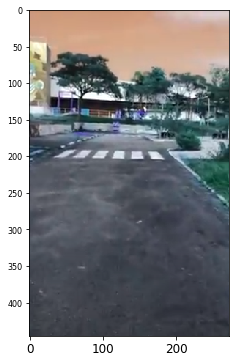

In [13]:
showfig(pista)

446 273 3


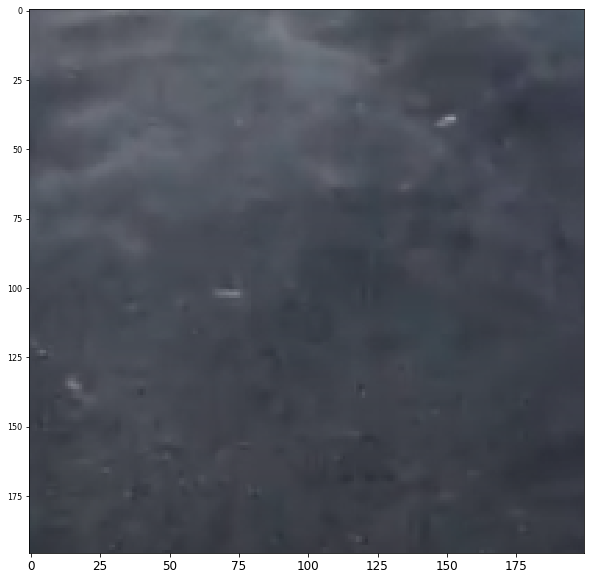

In [11]:
length, width, ch = pista.shape
print(length,width,ch)
crop = pista[250:length,0:200,:]
showfig(crop)

Cor média da imagem?

In [12]:
# calcular valor médio pixelwise e.e
cont=0
soma =[]
fin = []
for i in range(ch):
    for j in range (length):
        for k in range (width):
            cont = cont + pista[j,k,i]
        soma.append(cont)
    media = int(cont/(length*width))
    fin.append(media)
    cont=0
print(fin)

[102, 103, 106]


In [13]:
a=np.mean(crop[0])
b=np.mean(crop[1])
c=np.mean(crop[2])
print(a,b,c)
# deu em torno de 98

98.87833333333333 98.41833333333334 97.32833333333333


Isso significa que o pico em RGB da imagem de interesse possui centro em 100, e deve corresponder ao primeiro pico do histograma em RGB apresentado anteriormente!

Então, faremos uma máscara na região de interesse!

Testar: [40,60,19.6] até [120,120,120]

Convertendo para HSV:(40,60,19.6) até (60.0000, 8.3333, 47.0588  #Deu mto ruim

In [17]:
# l_hsv= (40,60,19.6)
# u_hsv= (60.0000, 8.3333, 47.0588)
# upper= (60.0000, 100, 47.0588)
# mask =cv2.inRange(pista,l_hsv,upper)

# result = cv2.bitwise_and(pista,pista, mask=mask)
# showfig(result)

In [14]:
lw=(40,60,19.6)
up=(120,120,110)

In [15]:
def mask_it(img,lw,up):
    mask =cv2.inRange(img,lw,up)
    result = cv2.bitwise_and(img,img, mask=mask)
    return result

In [16]:
def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    mask = np.ones_like(img)

    poly = np.array([[  # Polígono para fazer a máscara (feito sob medida da)
    (0,0),
    (width,0),
    (width,150),
    (0,150),]], np.int32)
    masked=cv2.fillPoly(mask, poly,0) #return none --> preenche a região
    masked_image = cv2.bitwise_and(img, mask) #Ou exclusivo para ignorar oq estiver fora da mask
    return masked_image

Ajustar o conjunto RGB de interesse

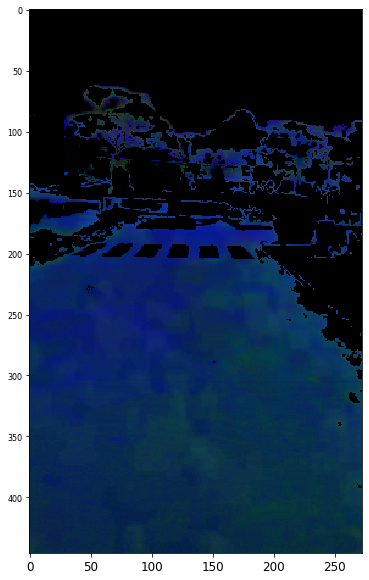

In [17]:
l1=(0,0,0)
up1=(40,70,160)
mask =mask_it(hsv,l1,up1)
showfig(mask)

In [ ]:
#Ignorar parte superior da imagem

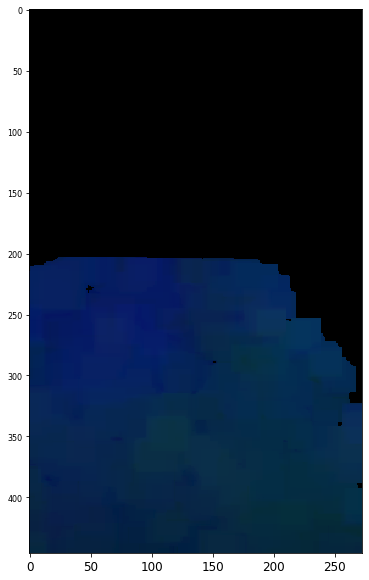

In [20]:
#Vamos tentar reconstruir a imagem com fechamento morfológico
kernel = np.ones((7,7),np.uint8)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel, iterations = 3)
showfig(opening)


Com esse conjunto de operações, foi possível montar uma máscara um pouco 
mais fidedigna da região de interesse... Mas será essa a melhor das opções?

Operando a máscara de interesse com a nossa imagem, temos: 

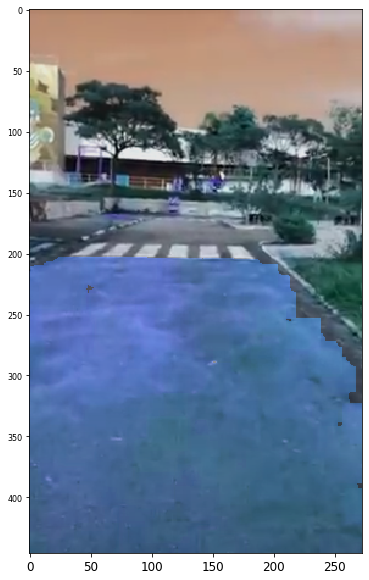

In [21]:
#Se fizermos a fusão da imagem original, temos:
combo = cv2.addWeighted(pista,0.9,opening,1,1)
showfig(combo)

Que é uma segmentação razoável!
Qual direção eu obteria a partir dessa máscara?

Vamos tentar o centróide da imagem!

[Fonte](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

Caminho

------------
- Converter a máscara para gray-scale;
- Binarizar;
- Calcular os momentos

In [23]:
# convert image to grayscale image
gray_mask = cv2.cvtColor(op, cv2.COLOR_BGR2GRAY)

# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_mask,0,255,0)

# calculate moments of binary image
M = cv2.moments(thresh)

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# put text and highlight the center
circle = np.zeros_like(pista)
cv2.circle(circle, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(circle, "centroide", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

#write the lines
cv2.line(circle, (cX,cY), (int(pista.shape[1]/2),pista.shape[0]),(255,0,0),2)



NameError: name 'op' is not defined

In [93]:
int(pista.shape[1]/2),pista.shape[0]
cX,cY
#m = (y-y0)/(x-x0)  = tan(theta)
rad= np.arctan((cY-pista.shape[0])/(cX-int(pista.shape[1]/2)))
print(rad) # radians?
theta= np.degrees(rad)
cv2.putText(circle, " %.5s graus"%theta, (cX - 125, cY - 125),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2);

1.5289046816989678


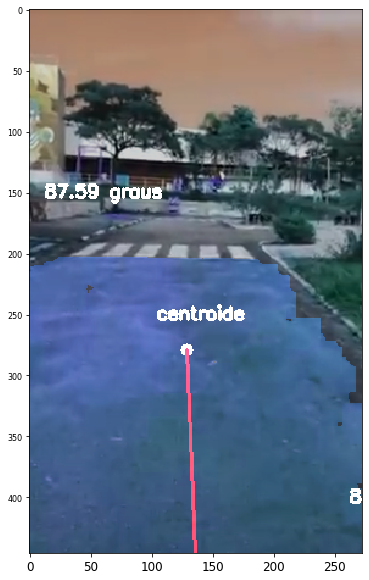

In [94]:
# display the image
combo2 = cv2.addWeighted(combo, 0.9, circle, 1, 0)
showfig(combo2)

# Próximo passo: determinar a direção em vídeo... Será que vai dar certo?